In [263]:
import numpy as np
import pandas as pd
import seaborn as sns

from matplotlib import pyplot as plt
import missingno as msno
from datetime import date
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.neighbors import LocalOutlierFactor
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, StandardScaler, RobustScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, confusion_matrix, classification_report

In [264]:
url = 'https://raw.githubusercontent.com/farrelrassya/teachingMLDL/main/01.%20Machine%20Learning/04.%20Week%204/Datasets/flu.csv'

df = pd.read_csv(url)
df.head()

,Diagnosis,InitialPCRDiagnosis,Age,Sex,neutrophil,serumLevelsOfWhiteBloodCell,lymphocytes,CReactiveProteinLevels,DurationOfIllness,CTscanResults,RiskFactors,GroundGlassOpacity,Diarrhea,Fever,Coughing,ShortnessOfBreath,SoreThroat,NauseaVomitting,Temperature,Fatigue
0,H1N1,NaN,67.000,F,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,Yes,NaN,No,NaN,38.111,No
1,H1N1,NaN,29.000,M,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,H1N1,NaN,22.000,F,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,H1N1,NaN,20.000,F,NaN,NaN,NaN,NaN,NaN,NaN,immuno,NaN,NaN,Yes,Yes,NaN,No,NaN,36.556,Yes
4,H1N1,NaN,21.000,M,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# **Exploratory Data Analysis**

In [265]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.float_format', lambda x: '%.3f' % x)
pd.set_option('display.width', 500)

In [266]:
def check_df(dataframe, head=5):
    print('##################### Shape #####################')
    print(dataframe.shape)
    print('##################### Types #####################')
    print(dataframe.dtypes)
    print('##################### Head #####################')
    print(dataframe.head(head))
    print('##################### Tail #####################')
    print(dataframe.tail(head))
    print('##################### NA #####################')
    print(dataframe.isnull().sum())
    print('##################### Quantiles #####################')
    print(dataframe.describe([0, 0.05, 0.50, 0.95, 0.99, 1]).T)

check_df(df)

##################### Shape #####################
(1482, 20)
##################### Types #####################
Diagnosis                       object
InitialPCRDiagnosis             object
Age                            float64
Sex                             object
neutrophil                     float64
serumLevelsOfWhiteBloodCell    float64
lymphocytes                    float64
CReactiveProteinLevels          object
DurationOfIllness              float64
CTscanResults                   object
RiskFactors                     object
GroundGlassOpacity              object
Diarrhea                        object
Fever                           object
Coughing                        object
ShortnessOfBreath               object
SoreThroat                      object
NauseaVomitting                 object
Temperature                    float64
Fatigue                         object
dtype: object
##################### Head #####################
  Diagnosis InitialPCRDiagnosis    Age Sex  ne

# **Feature Engineering & Visualization**

In [267]:
df.columns = [col.upper() for col in df.columns]

In [268]:
df.head()

,DIAGNOSIS,INITIALPCRDIAGNOSIS,AGE,SEX,NEUTROPHIL,SERUMLEVELSOFWHITEBLOODCELL,LYMPHOCYTES,CREACTIVEPROTEINLEVELS,DURATIONOFILLNESS,CTSCANRESULTS,RISKFACTORS,GROUNDGLASSOPACITY,DIARRHEA,FEVER,COUGHING,SHORTNESSOFBREATH,SORETHROAT,NAUSEAVOMITTING,TEMPERATURE,FATIGUE
0,H1N1,NaN,67.000,F,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,Yes,NaN,No,NaN,38.111,No
1,H1N1,NaN,29.000,M,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,H1N1,NaN,22.000,F,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,H1N1,NaN,20.000,F,NaN,NaN,NaN,NaN,NaN,NaN,immuno,NaN,NaN,Yes,Yes,NaN,No,NaN,36.556,Yes
4,H1N1,NaN,21.000,M,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [269]:
df["New_INITIAL_BOOL"] = df["INITIALPCRDIAGNOSIS"].notnull().astype("int")

In [270]:
if df['AGE'].isnull().any():
    df['AGE'] = df['AGE'].fillna(df['AGE'].median())

In [271]:
df.loc[(df["AGE"] < 18), "NEW_AGE_CAT"] = "young"
df.loc[(df["AGE"] >= 18) & (df["AGE"] < 56), "NEW_AGE_CAT"] = "mature"
df.loc[(df["AGE"] >= 56), "NEW_AGE_CAT"] = "senior"

In [272]:
df.loc[(df["SEX"] == "M") & (df["AGE"] <= 21), "NEW_SEX_CAT"] = "youngmale"
df.loc[(df["SEX"] == "M") & ((df["AGE"] > 21) & (df["AGE"]) <= 50), "NEW_SEX_CAT"] = "maturemale"
df.loc[(df["SEX"] == "M") & (df["AGE"] > 50), "NEW_SEX_CAT"] = "seniormale"
df.loc[(df["SEX"] == "F") & (df["AGE"] <= 21), "NEW_SEX_CAT"] = "youngfemale"
df.loc[(df["SEX"] == "F") & ((df["AGE"] > 21) & (df["AGE"]) <= 50), "NEW_SEX_CAT"] = "maturefemale"
df.loc[(df["SEX"] == "F") & (df["AGE"] > 50), "NEW_SEX_CAT"] = "seniorfemale"

In [273]:
df.head()

,DIAGNOSIS,INITIALPCRDIAGNOSIS,AGE,SEX,NEUTROPHIL,SERUMLEVELSOFWHITEBLOODCELL,LYMPHOCYTES,CREACTIVEPROTEINLEVELS,DURATIONOFILLNESS,CTSCANRESULTS,RISKFACTORS,GROUNDGLASSOPACITY,DIARRHEA,FEVER,COUGHING,SHORTNESSOFBREATH,SORETHROAT,NAUSEAVOMITTING,TEMPERATURE,FATIGUE,New_INITIAL_BOOL,NEW_AGE_CAT,NEW_SEX_CAT
0,H1N1,NaN,67.000,F,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,Yes,NaN,No,NaN,38.111,No,0,senior,seniorfemale
1,H1N1,NaN,29.000,M,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,mature,maturemale
2,H1N1,NaN,22.000,F,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,mature,maturefemale
3,H1N1,NaN,20.000,F,NaN,NaN,NaN,NaN,NaN,NaN,immuno,NaN,NaN,Yes,Yes,NaN,No,NaN,36.556,Yes,0,mature,maturefemale
4,H1N1,NaN,21.000,M,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,mature,maturemale


In [274]:
df["CREACTIVEPROTEINLEVELS"] = pd.to_numeric(df["CREACTIVEPROTEINLEVELS"], errors='coerce')

In [275]:
# Analysis of Variables.

def grab_col_names(dataframe, cat_th=10, car_th=20):

    # cat_cols, cat_but_car
    cat_cols = [col for col in dataframe.columns if dataframe[col].dtypes == "O"]

    num_but_cat = [col for col in dataframe.columns if dataframe[col].nunique() < cat_th and
                   dataframe[col].dtypes != "O"]

    cat_but_car = [col for col in dataframe.columns if dataframe[col].nunique() > car_th and
                   dataframe[col].dtypes == "O"]

    cat_cols = cat_cols + num_but_cat

    cat_cols = [col for col in cat_cols if col not in cat_but_car]

    num_cols = [col for col in dataframe.columns if dataframe[col].dtypes != "O"]

    num_cols = [col for col in num_cols if col not in num_but_cat]

    print(f"Observations: {dataframe.shape[0]}")
    print(f"Variables: {dataframe.shape[1]}")
    print(f'cat_cols: {len(cat_cols)}')
    print(f'num_cols: {len(num_cols)}')
    print(f'cat_but_car: {len(cat_but_car)}')
    print(f'num_but_cat: {len(num_but_cat)}')


    return cat_cols, num_cols, cat_but_car, num_but_cat

In [276]:
cat_cols, num_cols, cat_but_car, num_but_cat = grab_col_names(df)

Observations: 1482
Variables: 23
cat_cols: 15
num_cols: 7
cat_but_car: 1
num_but_cat: 1


In [277]:
cat_cols

['DIAGNOSIS',
 'INITIALPCRDIAGNOSIS',
 'SEX',
 'CTSCANRESULTS',
 'GROUNDGLASSOPACITY',
 'DIARRHEA',
 'FEVER',
 'COUGHING',
 'SHORTNESSOFBREATH',
 'SORETHROAT',
 'NAUSEAVOMITTING',
 'FATIGUE',
 'NEW_AGE_CAT',
 'NEW_SEX_CAT',
 'New_INITIAL_BOOL']

In [278]:
cat_cols = [col for col in cat_cols if "INITIALPCRDIAGNOSIS" not in col]

In [279]:
cat_cols

['DIAGNOSIS',
 'SEX',
 'CTSCANRESULTS',
 'GROUNDGLASSOPACITY',
 'DIARRHEA',
 'FEVER',
 'COUGHING',
 'SHORTNESSOFBREATH',
 'SORETHROAT',
 'NAUSEAVOMITTING',
 'FATIGUE',
 'NEW_AGE_CAT',
 'NEW_SEX_CAT',
 'New_INITIAL_BOOL']

In [280]:
num_cols

['AGE',
 'NEUTROPHIL',
 'SERUMLEVELSOFWHITEBLOODCELL',
 'LYMPHOCYTES',
 'CREACTIVEPROTEINLEVELS',
 'DURATIONOFILLNESS',
 'TEMPERATURE']

In [281]:
cat_but_car

['RISKFACTORS']

In [282]:
num_but_cat

['New_INITIAL_BOOL']

In [283]:
# Categorical Summary Function

def cat_summary(dataframe, col_name, plot=False):
    if dataframe[col_name].dtypes == "bool":
        dataframe[col_name] = dataframe[col_name].astype(int)

        print(pd.DataFrame({col_name: dataframe[col_name].value_counts(),
                            "Ratio": 100 * dataframe[col_name].value_counts() / len(dataframe)}))
        print("##########################################")

        if plot:
            sns.countplot(x=dataframe[col_name], data=dataframe)
            plt.show(block=True)
    else:
        print(pd.DataFrame({col_name: dataframe[col_name].value_counts(),
                            "Ratio": 100 * dataframe[col_name].value_counts() / len(dataframe)}))
        print("##########################################")

        if plot:
            sns.countplot(x=dataframe[col_name], data=dataframe)
            plt.show(block=True)

# **Visualisasi data Kategori**

           DIAGNOSIS  Ratio
DIAGNOSIS                  
H1N1            1072 72.335
COVID19          410 27.665
##########################################


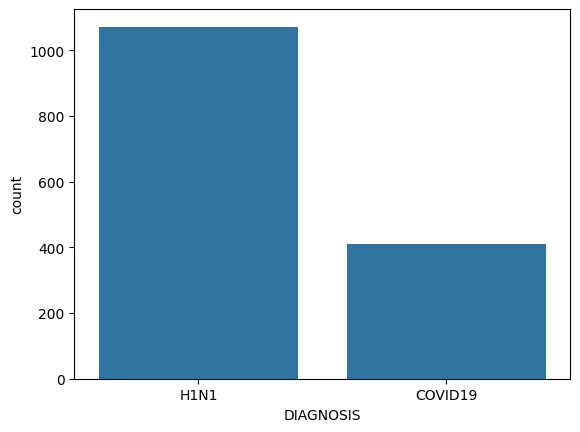

     SEX  Ratio
SEX            
M    748 50.472
F    658 44.399
##########################################


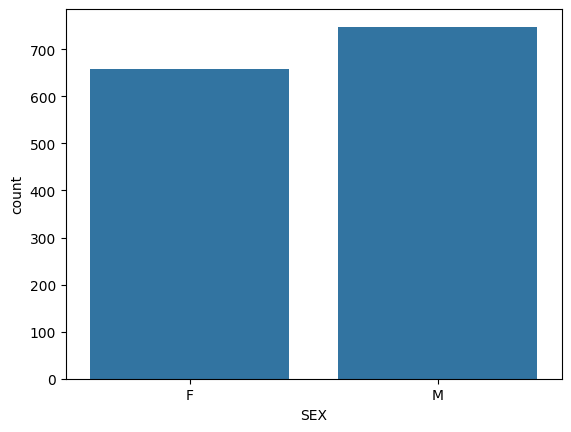

               CTSCANRESULTS  Ratio
CTSCANRESULTS                      
Yes                      144  9.717
No                        15  1.012
##########################################


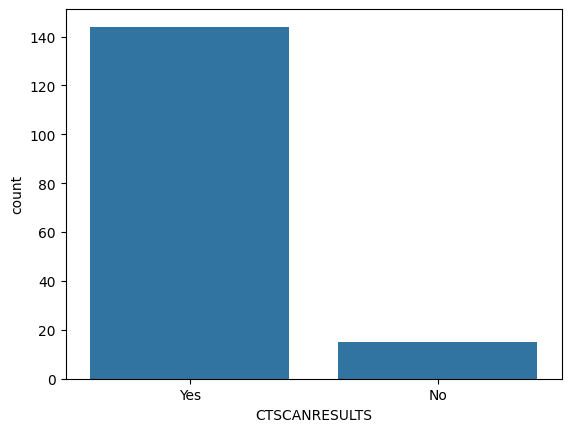

                    GROUNDGLASSOPACITY  Ratio
GROUNDGLASSOPACITY                           
Yes                                 90  6.073
No                                   3  0.202
##########################################


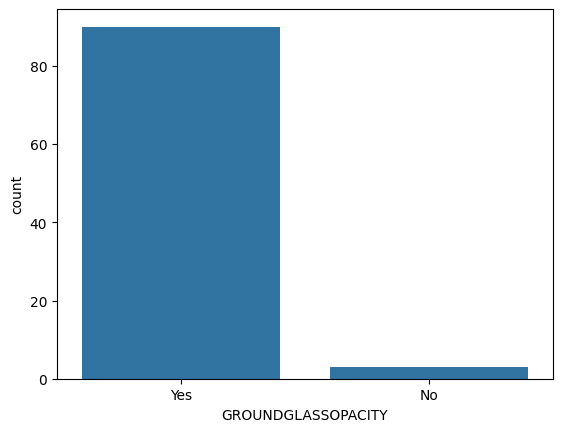

          DIARRHEA  Ratio
DIARRHEA                 
No             340 22.942
Yes            110  7.422
##########################################


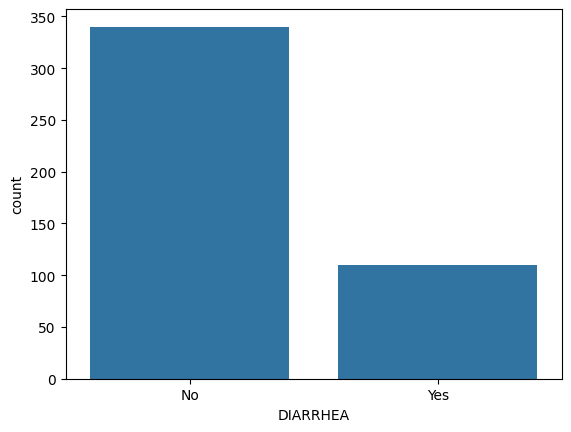

       FEVER  Ratio
FEVER              
Yes      777 52.429
No       146  9.852
##########################################


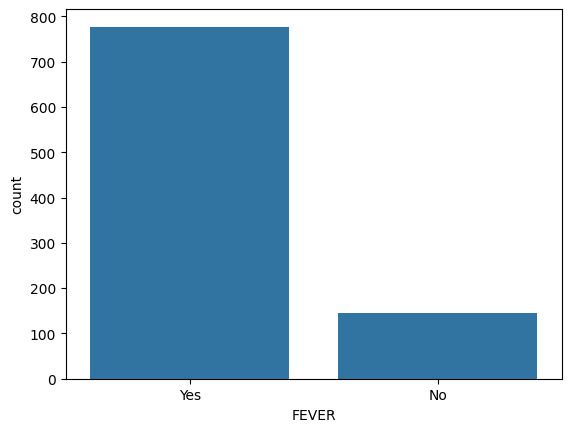

          COUGHING  Ratio
COUGHING                 
Yes            745 50.270
No             114  7.692
##########################################


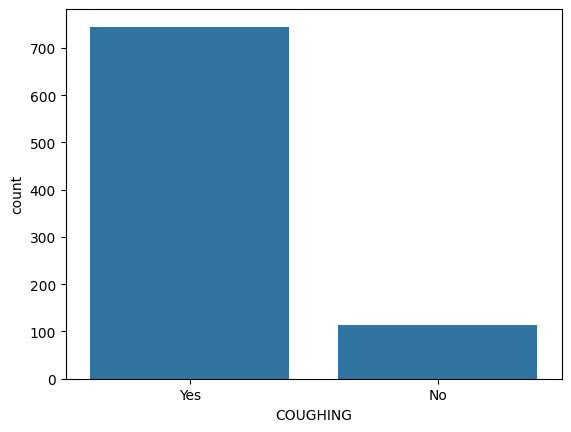

                   SHORTNESSOFBREATH  Ratio
SHORTNESSOFBREATH                          
Yes                               45  3.036
No                                30  2.024
##########################################


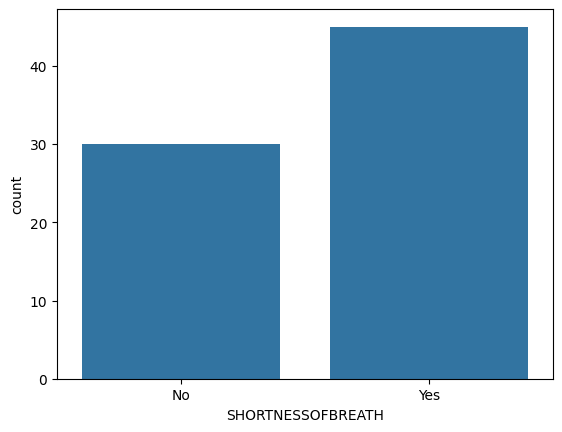

            SORETHROAT  Ratio
SORETHROAT                   
Yes                407 27.463
No                 263 17.746
##########################################


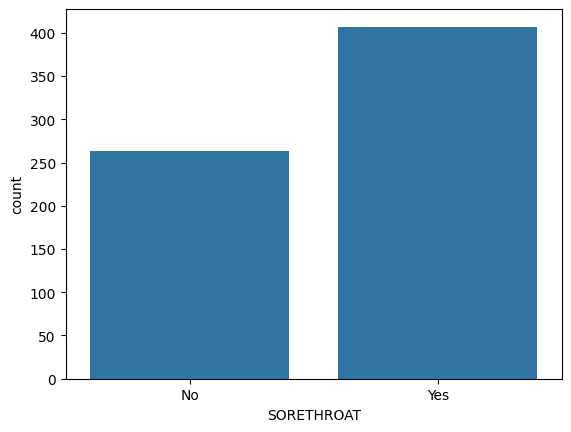

                 NAUSEAVOMITTING  Ratio
NAUSEAVOMITTING                        
No                           319 21.525
Yes                          102  6.883
##########################################


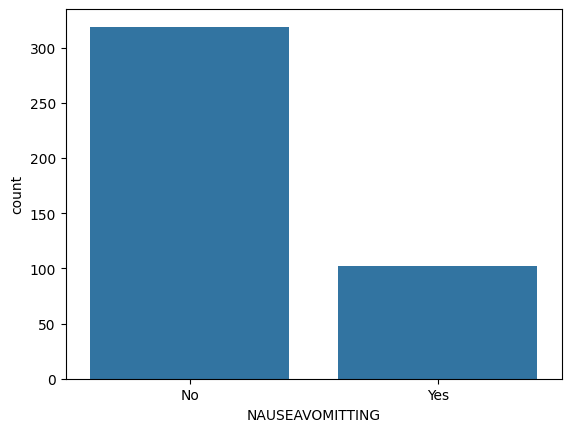

         FATIGUE  Ratio
FATIGUE                
Yes          348 23.482
No           183 12.348
##########################################


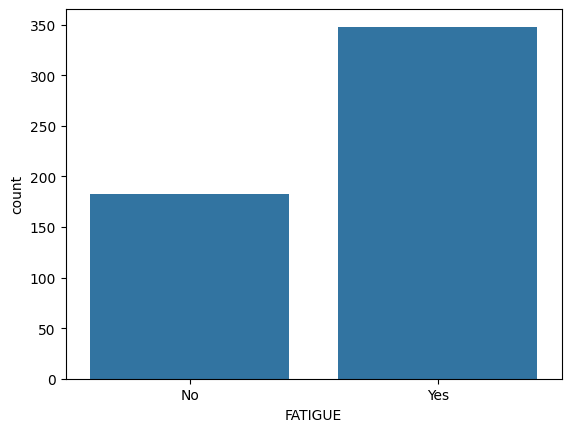

             NEW_AGE_CAT  Ratio
NEW_AGE_CAT                    
mature               675 45.547
young                628 42.375
senior               179 12.078
##########################################


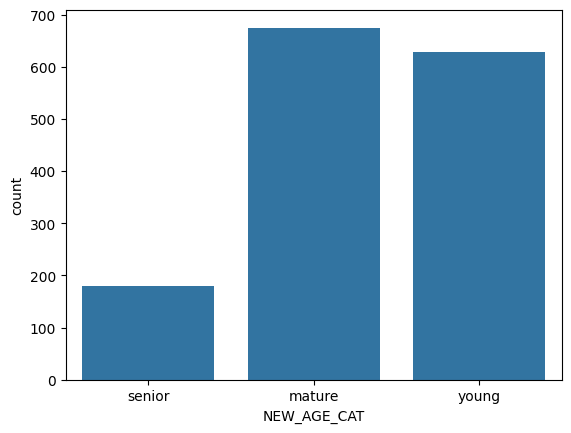

              NEW_SEX_CAT  Ratio
NEW_SEX_CAT                     
maturemale            616 41.565
maturefemale          553 37.314
seniormale            132  8.907
seniorfemale          105  7.085
##########################################


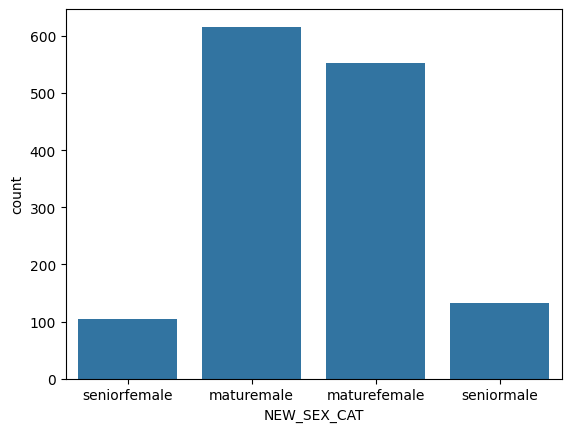

                  New_INITIAL_BOOL  Ratio
New_INITIAL_BOOL                         
0                             1378 92.982
1                              104  7.018
##########################################


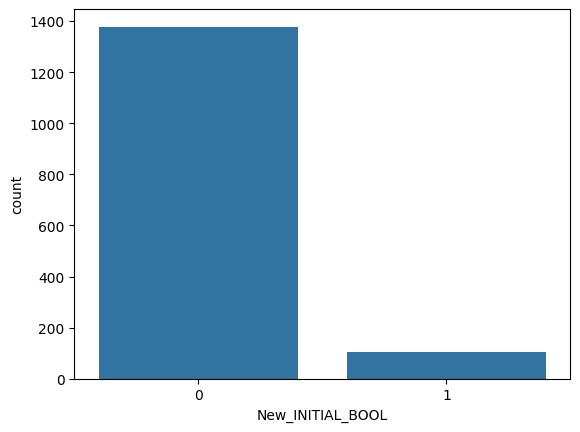

In [284]:
for col in cat_cols:
    cat_summary(df, col, plot=True)

In [285]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1482 entries, 0 to 1481
Data columns (total 23 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   DIAGNOSIS                    1482 non-null   object 
 1   INITIALPCRDIAGNOSIS          104 non-null    object 
 2   AGE                          1482 non-null   float64
 3   SEX                          1406 non-null   object 
 4   NEUTROPHIL                   103 non-null    float64
 5   SERUMLEVELSOFWHITEBLOODCELL  151 non-null    float64
 6   LYMPHOCYTES                  156 non-null    float64
 7   CREACTIVEPROTEINLEVELS       136 non-null    float64
 8   DURATIONOFILLNESS            87 non-null     float64
 9   CTSCANRESULTS                159 non-null    object 
 10  RISKFACTORS                  209 non-null    object 
 11  GROUNDGLASSOPACITY           93 non-null     object 
 12  DIARRHEA                     450 non-null    object 
 13  FEVER             

In [286]:
# Outlier Threshold Calculation Function

def outlier_thresholds(dataframe, col_name, q1=0.05, q3=0.95):
    quartile1 = dataframe[col_name].quantile(q1)
    quartile3 = dataframe[col_name].quantile(q3)
    interquantile_range = quartile3 - quartile1
    up_limit = quartile3 + 1.5 * interquantile_range
    low_limit = quartile1 - 1.5 * interquantile_range
    return low_limit, up_limit

In [287]:
# Outlier Check Function

def check_outlier(dataframe, col_name):
    low_limit, up_limit = outlier_thresholds(dataframe, col_name)
    if dataframe[(dataframe[col_name] > up_limit) | (dataframe[col_name] < low_limit)].any(axis=None):
        return True
    else:
        return False

In [288]:
# Replace Outliers with Thresholds

def replace_with_thresholds(dataframe, variable):
    low_limit, up_limit = outlier_thresholds(dataframe, variable)
    dataframe.loc[(dataframe[variable] < low_limit), variable] = low_limit
    dataframe.loc[(dataframe[variable] > up_limit), variable] = up_limit

In [289]:
# Visualizing Outliers in a Boxplot

def boxplot_outliers(dataframe, col_name):
    plt.figure(figsize=(5, 5))
    sns.boxplot(x=dataframe[col_name])
    plt.show(block=True)

In [290]:
for col in num_cols:
    print(col, check_outlier(df, col))

AGE False
NEUTROPHIL True
SERUMLEVELSOFWHITEBLOODCELL True
LYMPHOCYTES True
CREACTIVEPROTEINLEVELS False
DURATIONOFILLNESS False
TEMPERATURE False


In [291]:
for col in num_cols:
    print(col, replace_with_thresholds(df, col))

AGE None
NEUTROPHIL None
SERUMLEVELSOFWHITEBLOODCELL None
LYMPHOCYTES None
CREACTIVEPROTEINLEVELS None
DURATIONOFILLNESS None
TEMPERATURE None


In [292]:
for col in num_cols:
    print(col, check_outlier(df, col))

AGE False
NEUTROPHIL False
SERUMLEVELSOFWHITEBLOODCELL False
LYMPHOCYTES False
CREACTIVEPROTEINLEVELS False
DURATIONOFILLNESS False
TEMPERATURE False


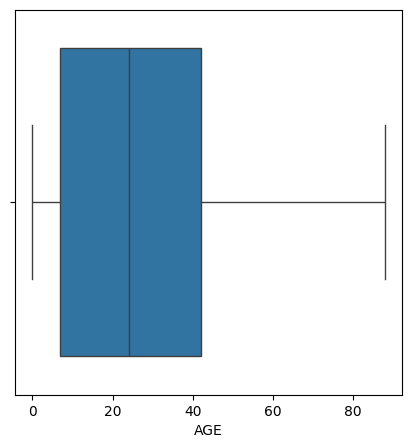

AGE None


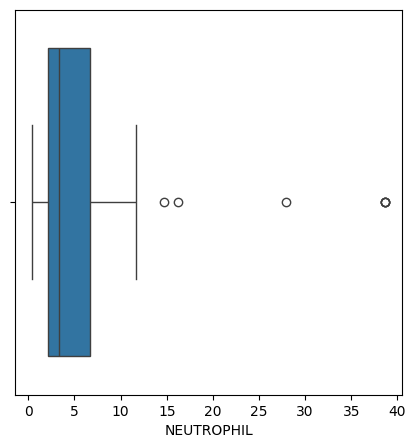

NEUTROPHIL None


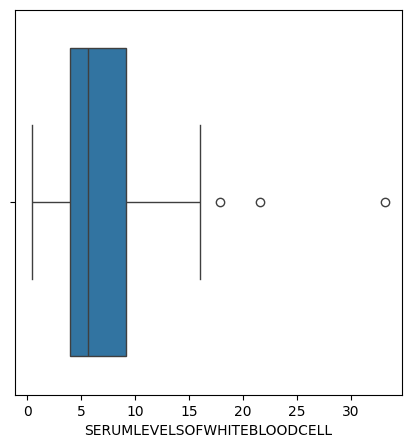

SERUMLEVELSOFWHITEBLOODCELL None


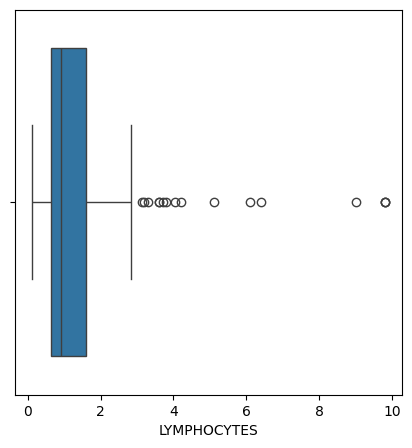

LYMPHOCYTES None


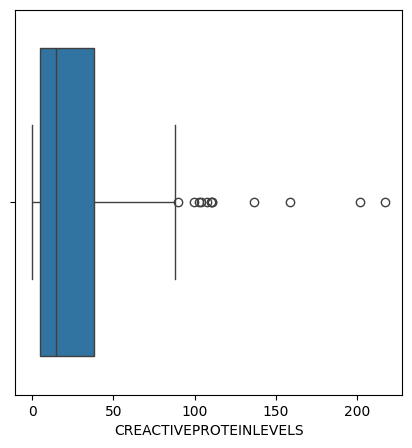

CREACTIVEPROTEINLEVELS None


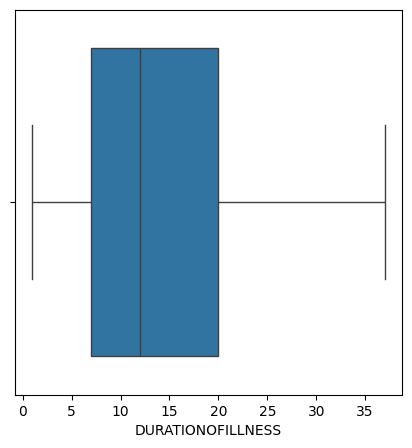

DURATIONOFILLNESS None


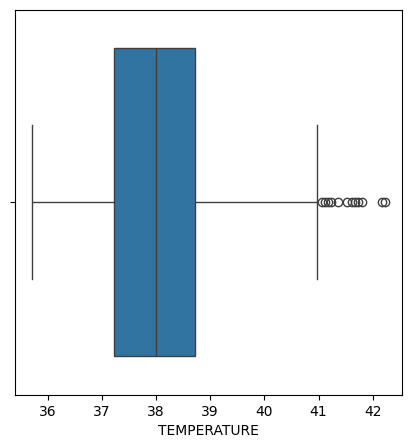

TEMPERATURE None


In [293]:
for col in num_cols:
    print(col, boxplot_outliers(df, col))

In [294]:
# Analyzing Missing Values in a DataFrame

def missing_values_table(dataframe, na_name=False):
    na_columns = [col for col in dataframe.columns if dataframe[col].isnull().sum() > 0]

    n_miss = dataframe[na_columns].isnull().sum().sort_values(ascending=False)
    ratio = (dataframe[na_columns].isnull().sum() / dataframe.shape[0] * 100).sort_values(ascending=False)
    missing_df = pd.concat([n_miss, np.round(ratio, 2)], axis=1, keys=['n_miss', 'ratio'])
    print(missing_df, end='\n')

    if na_name:
        return na_columns

In [295]:
missing_values_table(df, na_name=False)

                             n_miss  ratio
SHORTNESSOFBREATH              1407 94.940
DURATIONOFILLNESS              1395 94.130
GROUNDGLASSOPACITY             1389 93.720
NEUTROPHIL                     1379 93.050
INITIALPCRDIAGNOSIS            1378 92.980
CREACTIVEPROTEINLEVELS         1346 90.820
SERUMLEVELSOFWHITEBLOODCELL    1331 89.810
LYMPHOCYTES                    1326 89.470
CTSCANRESULTS                  1323 89.270
RISKFACTORS                    1273 85.900
NAUSEAVOMITTING                1061 71.590
DIARRHEA                       1032 69.640
FATIGUE                         951 64.170
TEMPERATURE                     854 57.620
SORETHROAT                      812 54.790
COUGHING                        623 42.040
FEVER                           559 37.720
SEX                              76  5.130
NEW_SEX_CAT                      76  5.130


In [296]:
df.drop("SHORTNESSOFBREATH", inplace=True, axis=1)

In [297]:
df.drop("DURATIONOFILLNESS", inplace=True, axis=1)

In [298]:
missing_values_table(df, na_name=False)

                             n_miss  ratio
GROUNDGLASSOPACITY             1389 93.720
NEUTROPHIL                     1379 93.050
INITIALPCRDIAGNOSIS            1378 92.980
CREACTIVEPROTEINLEVELS         1346 90.820
SERUMLEVELSOFWHITEBLOODCELL    1331 89.810
LYMPHOCYTES                    1326 89.470
CTSCANRESULTS                  1323 89.270
RISKFACTORS                    1273 85.900
NAUSEAVOMITTING                1061 71.590
DIARRHEA                       1032 69.640
FATIGUE                         951 64.170
TEMPERATURE                     854 57.620
SORETHROAT                      812 54.790
COUGHING                        623 42.040
FEVER                           559 37.720
SEX                              76  5.130
NEW_SEX_CAT                      76  5.130


In [299]:
# Imputasi SEX berdasarkan AGE

# Buat kategori usia
df["AGE_GROUP"] = pd.cut(df["AGE"], bins=[0, 12, 18, 35, 50, 100],
                         labels=["Anak", "Remaja", "Dewasa Muda", "Dewasa", "Lansia"])

# Ambil modus gender berdasarkan AGE_GROUP
gender_age_map = df.groupby("AGE_GROUP")["SEX"].agg(lambda x: x.mode()[0])

# Imputasi berdasarkan kelompok usia
df["SEX"] = df.apply(
    lambda row: gender_age_map[row["AGE_GROUP"]] if pd.isnull(row["SEX"]) else row["SEX"],
    axis=1
)


<ipython-input-299-8c14e92aae30>:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  gender_age_map = df.groupby("AGE_GROUP")["SEX"].agg(lambda x: x.mode()[0])


In [300]:
df.loc[(df["SEX"] == "M") & (df["AGE"] <= 21), "NEW_SEX_CAT"] = "youngmale"
df.loc[(df["SEX"] == "M") & ((df["AGE"] > 21) & (df["AGE"]) <= 50), "NEW_SEX_CAT"] = "maturemale"
df.loc[(df["SEX"] == "M") & (df["AGE"] > 50), "NEW_SEX_CAT"] = "seniormale"
df.loc[(df["SEX"] == "F") & (df["AGE"] <= 21), "NEW_SEX_CAT"] = "youngfemale"
df.loc[(df["SEX"] == "F") & ((df["AGE"] > 21) & (df["AGE"]) <= 50), "NEW_SEX_CAT"] = "maturefemale"
df.loc[(df["SEX"] == "F") & (df["AGE"] > 50), "NEW_SEX_CAT"] = "seniorfemale"

In [301]:
missing_values_table(df, na_name=False)

                             n_miss  ratio
GROUNDGLASSOPACITY             1389 93.720
NEUTROPHIL                     1379 93.050
INITIALPCRDIAGNOSIS            1378 92.980
CREACTIVEPROTEINLEVELS         1346 90.820
SERUMLEVELSOFWHITEBLOODCELL    1331 89.810
LYMPHOCYTES                    1326 89.470
CTSCANRESULTS                  1323 89.270
RISKFACTORS                    1273 85.900
NAUSEAVOMITTING                1061 71.590
DIARRHEA                       1032 69.640
FATIGUE                         951 64.170
TEMPERATURE                     854 57.620
SORETHROAT                      812 54.790
COUGHING                        623 42.040
FEVER                           559 37.720
AGE_GROUP                        38  2.560


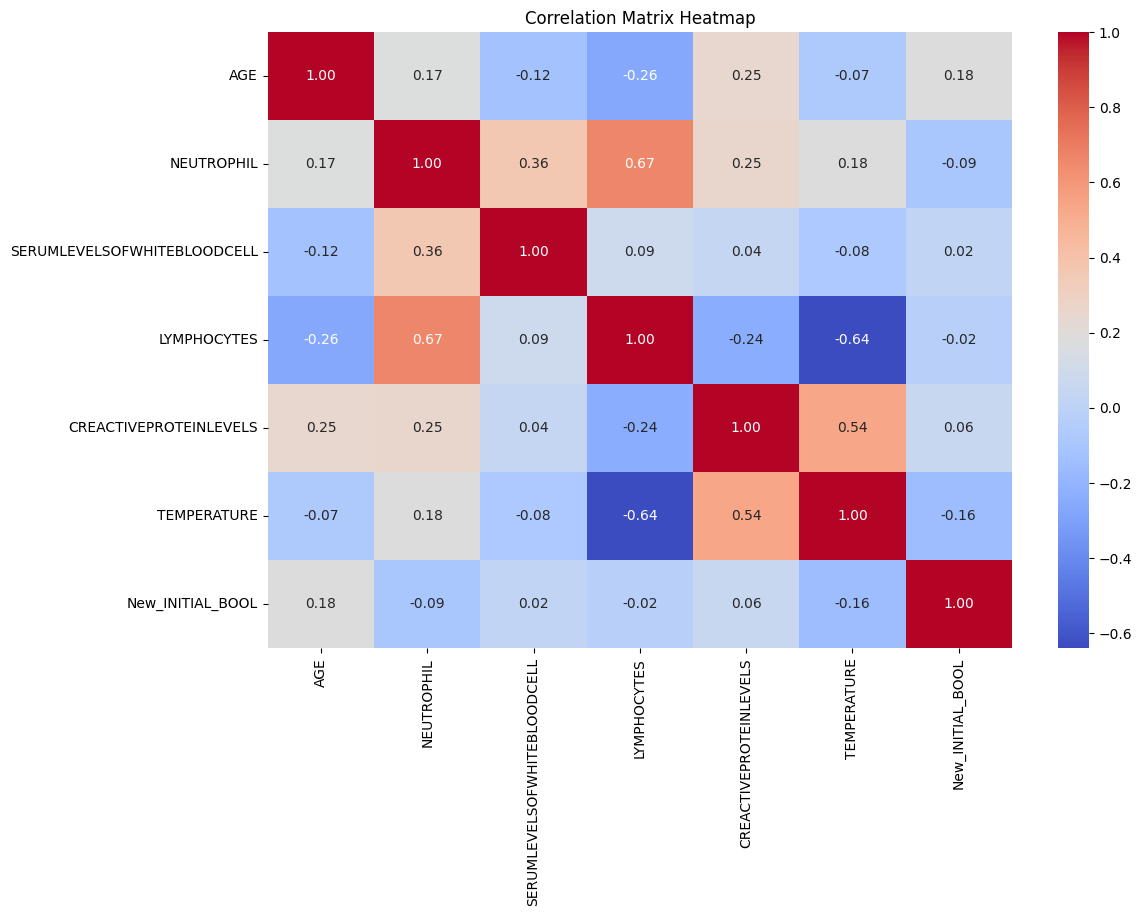

In [302]:
# Correlation Matrix and Heatmap
correlation_matrix = df.corr(numeric_only=True)
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Heatmap')
plt.show()

# **Evaluasi**

In [303]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1482 entries, 0 to 1481
Data columns (total 22 columns):
 #   Column                       Non-Null Count  Dtype   
---  ------                       --------------  -----   
 0   DIAGNOSIS                    1482 non-null   object  
 1   INITIALPCRDIAGNOSIS          104 non-null    object  
 2   AGE                          1482 non-null   float64 
 3   SEX                          1482 non-null   object  
 4   NEUTROPHIL                   103 non-null    float64 
 5   SERUMLEVELSOFWHITEBLOODCELL  151 non-null    float64 
 6   LYMPHOCYTES                  156 non-null    float64 
 7   CREACTIVEPROTEINLEVELS       136 non-null    float64 
 8   CTSCANRESULTS                159 non-null    object  
 9   RISKFACTORS                  209 non-null    object  
 10  GROUNDGLASSOPACITY           93 non-null     object  
 11  DIARRHEA                     450 non-null    object  
 12  FEVER                        923 non-null    object  
 13  COU

In [314]:
df.head()

,DIAGNOSIS,INITIALPCRDIAGNOSIS,AGE,SEX,NEUTROPHIL,SERUMLEVELSOFWHITEBLOODCELL,LYMPHOCYTES,CREACTIVEPROTEINLEVELS,CTSCANRESULTS,RISKFACTORS,GROUNDGLASSOPACITY,DIARRHEA,FEVER,COUGHING,SORETHROAT,NAUSEAVOMITTING,TEMPERATURE,FATIGUE,New_INITIAL_BOOL,NEW_AGE_CAT,NEW_SEX_CAT
0,H1N1,NaN,67.000,F,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,Yes,No,NaN,38.111,No,0,senior,seniorfemale
1,H1N1,NaN,29.000,M,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,mature,maturemale
2,H1N1,NaN,22.000,F,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,mature,maturefemale
3,H1N1,NaN,20.000,F,NaN,NaN,NaN,NaN,NaN,immuno,NaN,NaN,Yes,Yes,No,NaN,36.556,Yes,0,mature,maturefemale
4,H1N1,NaN,21.000,M,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,mature,maturemale


In [305]:
cat_cols = [col for col in cat_cols if "SHORTNESSOFBREATH" not in col]

In [306]:
df.drop("AGE_GROUP", inplace=True, axis=1)

In [311]:
# prompt: Accuracy evaluation

# Assuming 'y' is your target variable and 'X' is your feature matrix
#  and you have already trained a model, e.g., 'model'

# Example: Split data into training and testing sets
X = df.drop(cat_cols, axis=1)
y = df["DIAGNOSIS"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Assuming 'model' is your trained classifier
# Example: Using a RandomForestClassifier
model = RandomForestClassifier(random_state=42)  # You should replace this with your actual model

#Preprocessing
def label_encode_columns(dataframe, columns):
    le = LabelEncoder()
    for col in columns:
        if dataframe[col].dtype == 'object':
          dataframe[col] = le.fit_transform(dataframe[col])
    return dataframe

categorical_cols = [col for col in X_train.columns if X_train[col].dtype == 'object']

X_train = label_encode_columns(X_train, categorical_cols)
X_test = label_encode_columns(X_test, categorical_cols)


model.fit(X_train, y_train)
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")


Accuracy: 0.30303030303030304


In [317]:
print("\nEvaluasi Model")
print("Akurasi  :", accuracy_score(y_test, y_pred))
print("Presisi  :", precision_score(y_test, y_pred, pos_label='COVID19'))  # Specify pos_label for precision
print("Recall   :", recall_score(y_test, y_pred, pos_label='COVID19'))  # Specify pos_label for recall
print("F1 Score :", f1_score(y_test, y_pred, pos_label='COVID19'))  # Specify pos_label for F1-score

# Convert predictions to probabilities for ROC AUC calculation if necessary
y_prob = model.predict_proba(X_test)[:, 1]  # Assuming 'COVID19' is the positive class (index 1)

print("AUC ROC  :", roc_auc_score(y_test, y_prob))


Evaluasi Model
Akurasi  : 0.30303030303030304
Presisi  : 0.30303030303030304
Recall   : 1.0
F1 Score : 0.46511627906976744
AUC ROC  : 0.8195652173913043


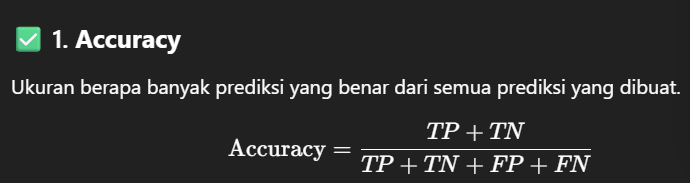

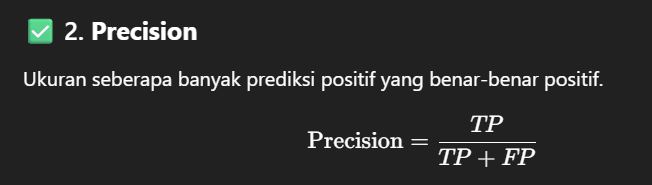

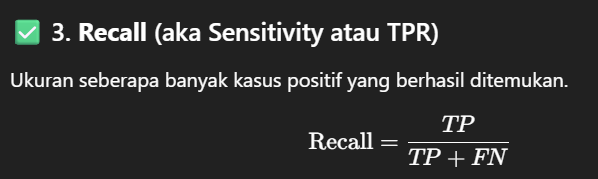

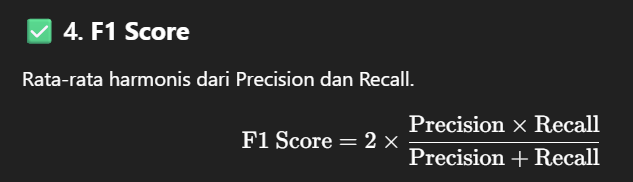